# Beyond gradient descent
## Метод сопряжённых градиентов и тяжёлого шарика

## Система линейных уравнений vs. задача безусловной минимизации
Рассмотрим задачу

$$
\min_{x \in \mathbb{R}^n} \frac{1}{2}x^{\top}Ax - b^{\top}x,
$$

где $A \in \mathbb{S}^n_{++}$.
Из необходимого условия экстремума имеем

$$
Ax^* = b
$$

Также обозначим $f'(x_k) = Ax_k - b = r_k$

## Как решить систему $Ax = b$?

- Прямые методы основаны на матричных разложениях:
    - Плотная матрица $A$: для размерностей не больше нескольких тысяч
    - Разреженная (sparse) матрица $A$: для размерностей порядка $10^4 - 10^5$
- Итерационные методы: хороши во многих случаях, единственный подход для задач с размерностью $ > 10^6$

## Метод сопряжённых направлений

В градиентном спуске направления убывания - анти-градиенты, но для функций с плохо обусловленным гессианом сходимость **медленная**.

**Идея:** двигаться вдоль направлений, которые гарантируют сходимость за $n$ шагов.

**Определение.** Множество ненулевых векторов $\{p_0, \ldots, p_l\}$ называется *сопряжённым* относительно матрицы $A \in \mathbb{S}^n_{++}$, если 

$$
p^{\top}_iAp_j = 0, \qquad i \neq j
$$

**Утверждение.** Для любой $x_0 \in \mathbb{R}^n$ последовательность $\{x_k\}$, генерируемая методом сопряжённых направлений, сходится к решению системы $Ax = b$ максимум за $n$ шагов.

```python
def ConjugateDirections(x0, A, b, p):
    
    x = x0
    
    r = A.dot(x) - b
    
    for i in range(len(p)):
        
        alpha = - (r.dot(p[i])) / (p[i].dot(A.dot(p[i])))
        
        x = x + alpha * p[i]
        
        r = A.dot(x) - b
        
    return x

```

### Примеры сопряжённых направлений

- Собственные векторы матрицы $A$
- Для любого набора из $n$ векторов можно провести аналог ортогонализации Грама-Шмидта и получить сопряжённые направления

**Вопрос:** что такое ортогонализация Грама-Шмидта? :)

## Метод сопряжённых градиентов

**Идея:** новое направление $p_k$ ищется в виде $p_k = -r_k + \beta_k p_{k-1}$, где $\beta_k$ выбирается, исходя из требования сопряжённости $p_k$ и $p_{k-1}$:

$$
\beta_k = \dfrac{p^{\top}_{k-1}Ar_k}{p^{\top}_{k-1}Ap_{k-1}}
$$

Таким образом, для получения следующего сопряжённого направления $p_k$ необходимо хранить только сопряжённое направление $p_{k-1}$ и остаток $r_k$ с предыдущей итерации. 

**Вопрос:** как находить размер шага $\alpha_k$?

## Сопряжённость сопряжённых градиентов

**Теорема**
Пусть после $k$ итераций $x_k \neq x^*$. Тогда 

- $\langle r_k, r_i \rangle = 0, \; i = 1, \ldots k - 1$
- $\mathtt{span}(r_0, \ldots, r_k) = \mathtt{span}(r_0, Ar_0, \ldots, A^kr_0)$
- $\mathtt{span}(p_0, \ldots, p_k) = \mathtt{span}(r_0, Ar_0, \ldots, A^kr_0)$
- $p_k^{\top}Ap_i = 0$, $i = 1,\ldots,k-1$

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости

$$
\| x_{k} - x^* \|_A \leq 2\left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$

где $\|x\|^2_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_1(A)}{\lambda_n(A)}$ - число обусловленности матрицы $A$, $\lambda_1(A) \geq ... \geq \lambda_n(A)$ - собственные значения матрицы $A$

**Замечание:** сравните коэффициент геометрической прогрессии с аналогом в градиентном спуске.

### Интерпретации метода сопряжённых градиентов

- Градиентный спуск в пространстве $y = Sx$, где $S = [p_0, \ldots, p_n]$, в котором матрица $A$ становится диагональной (или единичной в случае ортонормированности сопряжённых направлений)
- Поиск оптимального решения в [Крыловском подпространстве](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) $\mathcal{K}_k(A) = \{b, Ab, A^2b, \ldots A^{k-1}b\}$

$$
x_k = \arg\min_{x \in \mathcal{K}_k} f(x)
$$

- Однако естественный базис Крыловского пространства неортогональный и, более того, **плохо обусловлен**.

**Упражнение** Проверьте численно, насколько быстро растёт обусловленность матрицы из векторов $\{b, Ab, ... \}$

- Поэтому его необходимо ортогонализовать, что и происходит в методе сопряжённых градиентов

### Основное свойство
$$ 
A^{-1}b \in \mathcal{K}_n(A)
$$

Доказательство

- Теорема Гамильтона-Кэли: $p(A) = 0$, где $p(\lambda) = \det(A - \lambda I)$
- $p(A)b = A^nb + a_1A^{n-1}b + \ldots + a_{n-1}Ab + a_n b = 0$
- $A^{-1}p(A)b = A^{n-1}b + a_1A^{n-2}b + \ldots + a_{n-1}b + a_nA^{-1}b = 0$
- $A^{-1}b = -\frac{1}{a_n}(A^{n-1}b + a_1A^{n-2}b + \ldots + a_{n-1}b)$

### Улучшенная версия метода сопряжённых градиентов
На практике используются следующие формулы для шага $\alpha_k$ и коэффициента $\beta_{k}$:

$$
\alpha_k = \dfrac{r^{\top}_k r_k}{p^{\top}_{k}Ap_{k}} \qquad \beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$

**Вопрос:** чем они лучше базовой версии?

### Псевдокод метода сопряжённых градиентов
```python
def ConjugateGradientQuadratic(x0, A, b, eps):
    
    r = A.dot(x0) - b
    
    p = -r
    
    while np.linalg.norm(r) > eps:
        
        alpha = r.dot(r) / p.dot(A.dot(p))
        
        x = x + alpha * p
        
        r_next = r + alpha * A.dot(p)
        
        beta = r_next.dot(r_next) / r.dot(r)
        
        p = -r_next + beta * p
        
        r = r_next
        
    return x
```

## Метод сопряжённых градиентов для неквадратичной функции
**Идея:** использовать градиенты $f'(x_k)$ неквадратичной функции вместо остатков $r_k$ и линейный поиск шага $\alpha_k$ вместо аналитического вычисления. Получим метод Флетчера-Ривса.

```python
def ConjugateGradientFR(f, gradf, x0, eps):
    
    x = x0
    
    grad = gradf(x)
    
    p = -grad
    
    while np.linalg.norm(gradf(x)) > eps:
        
        alpha = StepSearch(x, f, gradf, **kwargs)
        
        x = x + alpha * p
        
        grad_next = gradf(x)
        
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        
        p = -grad_next + beta * p
        
        grad = grad_next
        
        if restart_condition:
            
            p = -gradf(x)
            
    return x
```

### Теорема сходимости

**Теорема.** Пусть 
- множество уровней $\mathcal{L}$ ограничено
- существует $\gamma > 0$: $\| f'(x) \|_2 \leq \gamma$ для $x \in \mathcal{L}$
Тогда

$$
\lim_{j \to \infty} \| f'(x_{k_j}) \|_2 = 0
$$

### Перезапуск (restart)

1. Для ускорения метода сопряжённых градиентов используют технику перезапусков: удаление ранее накопленной истории и перезапуск метода с текущей точки, как будто это точка $x_0$
2. Существуют разные условия, сигнализирующие о том, что надо делать перезапуск, например
    - $k = n$
    - $\dfrac{|\langle f'(x_k), f'(x_{k-1}) \rangle |}{\| f'(x_k) \|_2^2} \geq \nu \approx 0.1$
3. Можно показать (см. Nocedal, Wright Numerical Optimization, Ch. 5, p. 125), что запуск метода Флетчера-Ривза без использования перезапусков на некоторых итерациях может приводить к крайне медленной сходимости! 
4. Метод Полака-Рибьера и его модификации лишены подобного недостатка.

### Комментарии
- Замечательная методичка "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" размещена [тут](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
- Помимо метода Флетчера-Ривса существуют другие способы вычисления $\beta_k$: метод Полака-Рибьера, метод Хестенса-Штифеля...
- Для метода сопряжённых градиентов требуется 4 вектора: каких?
- Самой дорогой операцией является умножение матрицы на вектор

## Эксперименты


### Квадратичная целевая функция

In [2]:
import numpy as np
n = 100
# Random
# A = np.random.randn(n, n)
# A = A.T.dot(A)
# Clustered eigenvalues
A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.randn(n)
# Hilbert matrix
# A = np.array([[1.0 / (i+j - 1) for i in range(1, n+1)] for j in range(1, n+1)])
# b = np.ones(n)

f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


#### Распределение собственных значений

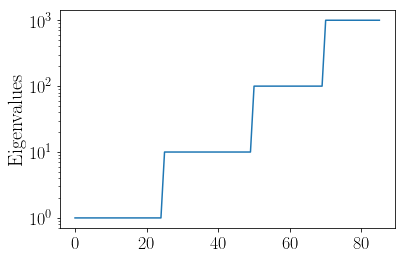

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("font", family='serif')
eigs = np.linalg.eigvalsh(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Правильный ответ

In [4]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [5]:
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, method="CG", jac=grad_f, callback=scopt_cg_callback)
x = x.x
print("||f'(x*)|| =", np.linalg.norm(A.dot(x) - b))
print("f* =", f(x))

||f'(x*)|| = 2.5592968616118273e-09
f* = -13.885945458007528


#### Реализация метода сопряжённых градиентов

In [6]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [7]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

max_iter = 70
print("\t CG quadratic")
cg_quad = methods.fo.ConjugateGradientQuad(A, b)
x_cg = cg_quad.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, grad_f, ss.ExactLineSearch4Quad(A, b))
x_gd = gd.solve(x0, tol=1e-7, max_iter=max_iter, disp=True)

print("Condition number of A =", abs(max(eigs)) / abs(min(eigs)))

	 CG quadratic
Required tolerance achieved!
Convergence in 4 iterations
Function value = -13.885945458007432
Norm of gradient = 9.530176632435635
	 Gradient Descent
Maximum iteration exceeds!
Convergence in 70 iterations
Function value = -4.505606933125172
Norm of gradient = 7.66200381895144
Condition number of A = 1000.0000000003456


#### График сходимости

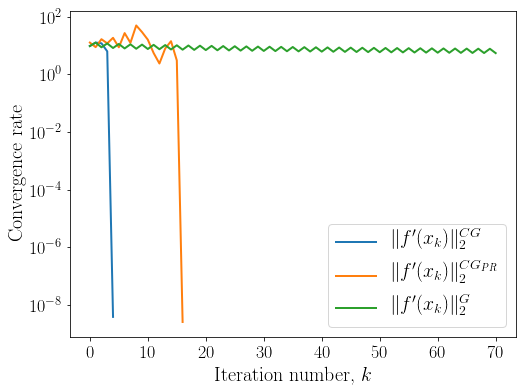

In [8]:
plt.figure(figsize=(8,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()], label=r"$\|f'(x_k)\|^{CG}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array[:max_iter]], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

In [126]:
print([np.linalg.norm(grad_f(x)) for x in cg_quad.get_convergence()])

[9.895698804404647, 16.72191678481416, 13.249478400747469, 6.359343682948846, 2.062260422407552e-09]


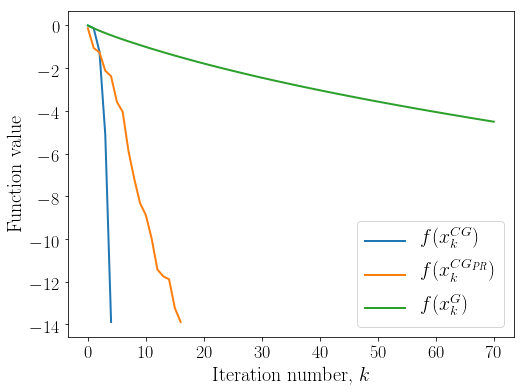

In [9]:
plt.figure(figsize=(8,6))
plt.plot([f(x) for x in cg_quad.get_convergence()], label=r"$f(x^{CG}_k)$", linewidth=2)
plt.plot([f(x) for x in scopt_cg_array], label=r"$f(x^{CG_{PR}}_k)$", linewidth=2)
plt.plot([f(x) for x in gd.get_convergence()], label=r"$f(x^{G}_k)$", linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Function value", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

### Неквадратичная функция

$$
f(w) = \frac12 \|w\|_2^2 + C \frac1m \sum_{i=1}^m \log (1 + \exp(- y_i \langle x_i, w \rangle)) \to \min_w
$$

In [1]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec
import jax
import jax.numpy as jnp
from jax.config import config
config.update("jax_enable_x64", True)

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3, random_state=0)
X = jnp.array(X)
y = jnp.array(y)
C = 1
@jax.jit
def f(w):
    return jnp.linalg.norm(w)**2 / 2 +  C * jnp.mean(jnp.logaddexp(jnp.zeros(X.shape[0]), -y * (X @ w)))

autograd_f = jax.jit(jax.grad(f))
def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w - C * X.T.dot(y * denom) / X.shape[0]

x0 = jax.random.normal(jax.random.PRNGKey(0), (n,))
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(jnp.linalg.norm(autograd_f(x0))))
print("Initial gradient norm = {}".format(jnp.linalg.norm(grad_f(x0))))

Initial function value = 168.30680645471432
Initial gradient norm = 18.78302765900879
Initial gradient norm = 18.78302765900879


#### Реализация метода Флетчера-Ривса

In [13]:
def ConjugateGradientFR(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    it = 0
    while np.linalg.norm(gradf(x)) > tol and it < num_iter:
        alpha = utils.backtracking(x, p, method="Wolfe", beta1=0.1, beta2=0.4, rho=0.5, f=f, grad_f=gradf)
        if alpha < 1e-18:
            break
        x = x + alpha * p
        if callback is not None:
            callback(x)
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = gradf(x)
            p = -grad
    return x

#### График сходимости

In [12]:
import scipy.optimize as scopt
import liboptpy.restarts as restarts

n_restart = 60
tol = 1e-5
max_iter = 600

scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=autograd_f, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x
print("\t CG by Polak-Rebiere")
print("Norm of garient = {}".format(np.linalg.norm(autograd_f(x))))
print("Function value = {}".format(f(x)))

print("\t CG by Fletcher-Reeves")
# ss.Backtracking("Armijo", rho=0.5, beta=0.001, init_alpha=1.)
cg_fr = methods.fo.ConjugateGradientFR(f, autograd_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.3, beta2=0.8, init_alpha=1.))
x = cg_fr.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t CG by Fletcher-Reeves with restart n")
cg_fr_rest = methods.fo.ConjugateGradientFR(f, autograd_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.3, beta2=0.8, 
                                         init_alpha=1.), restarts.Restart(n // n_restart))
x = cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Gradient Descent")
gd = methods.fo.GradientDescent(f, autograd_f, ss.Backtracking("Wolfe", rho=0.9, beta1=0.1, beta2=0.8, init_alpha=1.))
x = gd.solve(x0, max_iter=max_iter, tol=tol, disp=True)

	 CG by Polak-Rebiere
Norm of garient = 1.7480763139359677e-05
Function value = 0.49544792969928625
	 CG by Fletcher-Reeves
Required tolerance achieved!
Convergence in 69 iterations
Function value = 0.4954479296746901
Norm of gradient = 5.886257629554925e-06
	 CG by Fletcher-Reeves with restart n
Required tolerance achieved!
Convergence in 70 iterations
Function value = 0.49544792967336343
Norm of gradient = 7.437484595946573e-06
	 Gradient Descent
Required tolerance achieved!
Convergence in 171 iterations
Function value = 0.49544792969385604
Norm of gradient = 8.530600310612475e-06


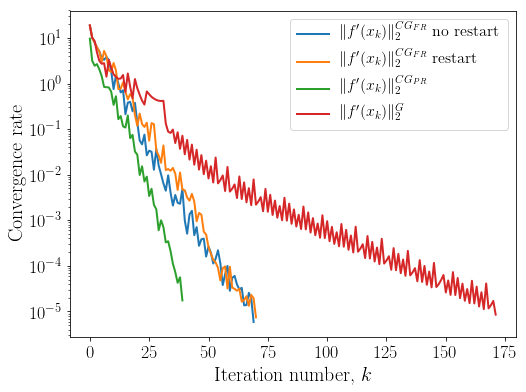

In [14]:
plt.figure(figsize=(8, 6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ no restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_fr_rest.get_convergence()], label=r"$\|f'(x_k)\|^{CG_{FR}}_2$ restart", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in scopt_cg_array], label=r"$\|f'(x_k)\|^{CG_{PR}}_2$", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd.get_convergence()], label=r"$\|f'(x_k)\|^{G}_2$", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

#### Время выполнения

In [19]:
%timeit scopt.minimize(f, x0, method="CG", tol=tol, jac=grad_f, options={"maxiter": max_iter})
%timeit cg_fr.solve(x0, tol=tol, max_iter=max_iter)
%timeit cg_fr_rest.solve(x0, tol=tol, max_iter=max_iter)
%timeit gd.solve(x0, tol=tol, max_iter=max_iter)

12.8 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
52.4 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.5 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
113 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Резюме

1. Сопряжённые направления
2. Метод сопряжённых градиентов
3. Сходимость
4. Эксперименты

## Метод тяжёлого шарика (heavy-ball method)

- [Предложен](http://www.mathnet.ru/links/453550bb5a36d7ff295e9a39c3333607/zvmmf7713.pdf) в 1964 г. [Б.Т. Поляком](https://scholar.google.ru/citations?user=Zhlib28AAAAJ&hl=ru&oi=ao)
<img src="./polyak.jpeg">
- Для квадратичной целевой функции зигзагообразное поведение градиентного спуска обусловлено неоднородностью направлений
- Давайте учитывать предыдущие направления для поиска новой точки
- Метод тяжёлого шарика

$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

- Помимо параметра шага вдоль антиградиента $\alpha_k$ появился ещё один параметр $\beta_k$

### Геометрическая интерпретация метода тяжёлого шарика

Картинка [отсюда](https://www.princeton.edu/~yc5/ele538_optimization/lectures/accelerated_gradient.pdf) 
<img src="./heavy_ball.png" width=600 align="center">

### Теорема сходимости

Пусть $f$ сильно выпукла с Липшицевым градиентом. Тогда для 

$$
\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}
$$ 

и 

$$
\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)
$$ 

справедлива следующая оценка сходимости

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$

- Совпадает с оценкой снизу для методов первого порядка!
- Оптимальные параметры $\alpha_k$ и $\beta_k$ определяются через **неизвестные** константы $L$ и $\mu$

### Схема доказательства

- Перепишем метод как 

\begin{align*}
\begin{bmatrix} x_{k+1}\\ x_k \end{bmatrix} = \begin{bmatrix} (1 + \beta_k)I & -\beta_k I\\ I & 0 \end{bmatrix} \begin{bmatrix} x_k\\ x_{k-1} \end{bmatrix} + \begin{bmatrix} -\alpha_k f'(x_k)\\ 0 \end{bmatrix}
\end{align*}

- Используем теорему из анализа

\begin{align*}
\begin{bmatrix} x_{k+1} - x^*\\ x_k - x^* \end{bmatrix} = \underbrace{ \begin{bmatrix} (1 + \beta_k)I - \alpha_k \int_0^1 f''(x(\tau))d\tau & -\beta_k I\\ I & 0 \end{bmatrix}}_{=A_k}\begin{bmatrix} x_k - x^*\\ x_{k-1} - x^*\end{bmatrix},
\end{align*}

где $x(\tau) = x_k + \tau(x^* - x_k) $
- В силу интегральной теоремы о среднем $A_k(x) = \int_0^1 f''(x(\tau))d\tau = f''(z)$, поэтому $L$ и $\mu$ ограничивают спектр $A_k(x)$
- Сходимость зависит от спектрального радиуса матрицы итераций $A_k$

- Получим оценку на спектр $A_k$

$$
A_k = \begin{bmatrix} (1 + \beta_k)I - \alpha_k A(x_k) & -\beta_k I \\ I & 0 \end{bmatrix}
$$

- Пусть $A(x_k) = U\Lambda(x_k) U^{\top}$, поскольку гессиан - симметричная матрица, тогда

$$
\begin{bmatrix} U^{\top} & 0 \\ 0 & U^{\top} \end{bmatrix} \begin{bmatrix} (1 + \beta_k)I - \alpha_k A(x_k) & -\beta_k I \\ I & 0 \end{bmatrix} \begin{bmatrix} U & 0\\ 0 & U \end{bmatrix} = \begin{bmatrix} (1 + \beta_k)I - \alpha_k \Lambda(x_k) & -\beta_k I \\ I & 0 \end{bmatrix} = \hat{A}_k
$$

- Ортогональное преобразование не меняет спектральный радиус матрицы
- Далее сделаем перестановку строк и столбцов так, чтобы 

$$
\hat{A}_k \simeq \mathrm{diag}(T_1, \ldots, T_n),
$$

где $T_i = \begin{bmatrix} 1 + \beta_k - \alpha_k \lambda_i & -\beta_k \\ 1 & 0 \end{bmatrix}$ и $\simeq$ обозначает равенство спектральных радиусов поскольку матрица перестановки является ортогональной

- Покажем как сделать такую перестановку на примере матрицы $4 \times 4$

$$ 
\begin{bmatrix}a & 0 & c & 0 \\ 0 & b & 0 & c \\ 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \end{bmatrix} \rightarrow \begin{bmatrix}a & 0 & c & 0 \\ 1 & 0 & 0 & 0 \\ 0 & b & 0 & c \\ 0 & 1 & 0 & 0 \end{bmatrix} \to \begin{bmatrix}a & c & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & b & c \\ 0 & 0 & 1 & 0 \end{bmatrix}
$$

- Свели задачу к оценке спектрального радиуса блочно-диагональной матрицы $\hat{A}_k$


- $\rho(\hat{A}_k) = \max\limits_{i=1,\ldots,n} \{ |\lambda_1(T_i)|, |\lambda_2(T_i)|\} $
- Характеристическое уравнение для $T_i$

$$
\beta_k - u (1 + \beta_k - \alpha_k \lambda_i - u) = 0 \quad u^2 - u(1 + \beta_k - \alpha_k\lambda_i) + \beta_k = 0
$$
- Дальнейшее изучение распределения корней и их границ даёт оценку из условия теоремы

### Эксперименты

### Тестовая задача 1

$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$

где матрица $A$ плохо обусловлена, но положительно определена!

In [15]:
import liboptpy.base_optimizer as base
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("text", usetex=True)

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [16]:
np.random.seed(42)
n = 100
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
print(L, mu)
print("Condition number = {}".format(L / mu))
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)
beta_test = 0.95

388.0536004941597 0.0017707060804670073
Condition number = 219151.89921966844
0.010263957266937775 0.9914918736024705


In [17]:
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(1 / L)),
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(1 / L), beta=beta_test),
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(alpha_opt), beta = beta_opt),
    "CG": fo.ConjugateGradientQuad(A, b)
}
x0 = np.random.randn(n)
max_iter = 5000
tol = 1e-6

In [18]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

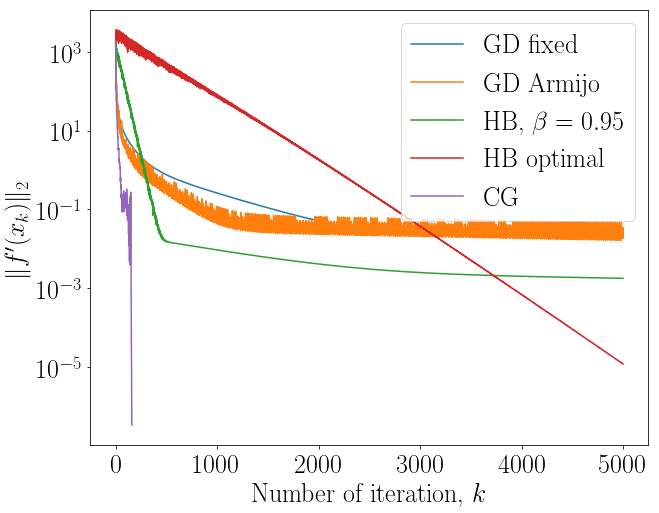

In [19]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [20]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD fixed
19.7 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
127 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
HB, $\beta = 0.95$
17.6 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
HB optimal
11.1 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
CG
610 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Тестовая задача 2

$$
f(w) = \frac12 \|w\|_2^2 + C \frac1m \sum_{i=1}^m \log (1 + \exp(- y_i \langle x_i, w \rangle)) \to \min_w
$$

In [20]:
n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)
C = 1

@jax.jit
def f(w):
    return jnp.linalg.norm(w)**2 / 2 +  C * jnp.mean(jnp.logaddexp(jnp.zeros(X.shape[0]), -y * (X @ w)))

# def grad(w):
#     denom = scspec.expit(-y * X.dot(w))
#     return w - C * X.T.dot(y * denom) / X.shape[0]

autograd_f = jax.jit(jax.grad(f))
x0 = jnp.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(jnp.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599448
Initial gradient norm = 3.1175896866257036


In [21]:
alpha_test = 5e-3
beta_test = 0.9

methods = {
    r"GD, $\alpha_k = {}$".format(alpha_test): fo.GradientDescent(f, autograd_f, ss.ConstantStepSize(alpha_test)),
    "GD Armijo": fo.GradientDescent(f, autograd_f, 
            ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, autograd_f, ss.ConstantStepSize(alpha_test), beta=beta_test),
    
}
# x0 = np.random.rand(n)
# x0 = jnp.zeros(n)
x0 = jax.random.normal(jax.random.PRNGKey(0), (X.shape[1],))
max_iter = 400
tol = 1e-5

In [22]:
for m in methods:
    print(m)
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)
    
scopt_cg_array = []
scopt_cg_callback = lambda x: callback(x, scopt_cg_array)
x = scopt.minimize(f, x0, tol=tol, method="CG", jac=autograd_f, callback=scopt_cg_callback, options={"maxiter": max_iter})
x = x.x

GD, $\alpha_k = 0.005$
GD Armijo
HB, $\beta = 0.9$


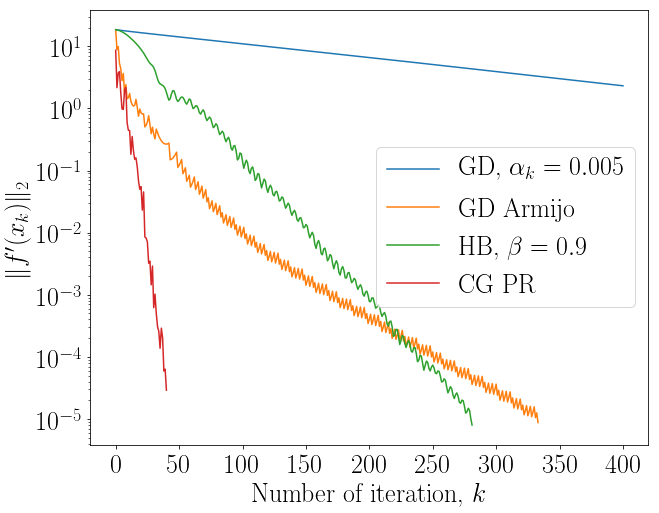

In [23]:
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(autograd_f(x)) for x in methods[m].get_convergence()], label=m)
plt.semilogy([np.linalg.norm(autograd_f(x)) for x in scopt_cg_array], label="CG PR")
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [43]:
for m in methods:
    print(m)
    %timeit methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

GD, $\alpha_k = 0.001$
53.1 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
GD Armijo
613 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
HB, $\beta = 0.9$
57.2 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Главное про метод тяжёлого шарика

- Двухшаговый метод
- Не обязательно монотонный
- Параметры зависят от неизвестных констант
- Решает проблему осцилляций для плохо обусловленных задач
- Сходимость для сильно выпуклых функций совпадает с оптимальной оценкой